# Aug

In [1]:
import numpy as np
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("./datas/dog_cat_data/train.csv")
test = pd.read_csv("./datas/dog_cat_data/test.csv")

In [3]:
def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename
        images.append(imread(filepath))
    
    images = np.array(images)
    
    return images

In [4]:
from scipy.misc import imresize
from matplotlib.pyplot import imread
%matplotlib inline

In [5]:
X_train = load_images(train["filename"], "./datas/dog_cat_data/train/")
X_test = load_images(test["filename"], "./datas/dog_cat_data/test/")

In [6]:
y_train = train["target"].values
y_test = test["target"].values

## Flip Image

In [7]:
image = X_train[0]
flipped_image = np.fliplr(image)

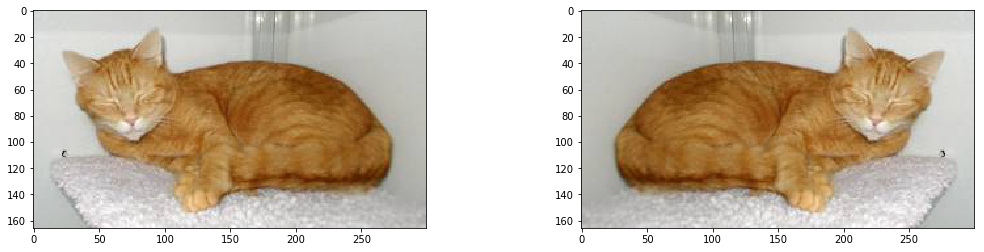

In [8]:
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

axes[0].imshow(flipped_image)
axes[1].imshow(X_train[0])

In [9]:
# 반복으로 모두 flip 시키기
def flip_images(original_images, original_labels):

    flipped_images = []
    flipped_labels = []

    for image, label in zip(original_images, original_labels):
        flipped_image = np.fliplr(image)

        flipped_images.append(image)
        flipped_labels.append(label)

        flipped_images.append(flipped_image)
        flipped_labels.append(label)
    
    return np.array(flipped_images), np.array(flipped_labels)

In [10]:
X_train_flip, y_train_flip = flip_images(X_train, y_train)

X_train_flip.shape, y_train_flip.shape

((4000,), (4000,))

In [11]:
X_test_flip, y_test_flip = flip_images(X_test, y_test)

X_test_flip.shape, y_test_flip.shape

((4000,), (4000,))

## Crop image

전혀 함수가 없어 까다롭다.

In [12]:
from skimage.transform import resize

def resize_images(images, size):
    resized_images = []

    for image in images:
        resized_image = resize(image, size)
        resized_images.append(resized_image)

    return np.array(resized_images)

In [13]:
# 먼저 이미지 크기를 같게 만든다.

X_train_256 = resize_images(X_train, (256, 256))
X_train_256[0].shape

/Users/ticonweb/anaconda2/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(256, 256, 3)

In [14]:
def crop_image(image, original_size, cropped_size):

    width_shift = np.random.randint(original_size[0] - cropped_size[0] - 1)
    height_shift = np.random.randint(original_size[1] - cropped_size[1] - 1)

    width_start = width_shift
    width_finish = cropped_size[0] + width_start

    height_start = height_shift
    height_finish = cropped_size[1] + height_start


#     print(width_start, height_start, width_finish, height_finish)

    # 이 기준으로 정확하게 crop 하면 된다!!!

    cr_img = image[width_start:width_finish, height_start:height_finish, :]
    return cr_img

In [15]:
def crop_images(original_images, original_labels, duplicate, original_size, cropped_size):
    
    cropped_images = []
    cropped_labels = []
    
    for image, label in zip(original_images, original_labels):
        for _ in range(duplicate):
            cropped_image = crop_image(image, original_size, cropped_size)
            cropped_images.append(cropped_image)
            cropped_labels.append(label)
        
    return np.array(cropped_images), np.array(cropped_labels)

In [16]:
cropped_image = crop_image(image, (256, 256), (224, 224))
cropped_image.shape

(160, 224, 3)

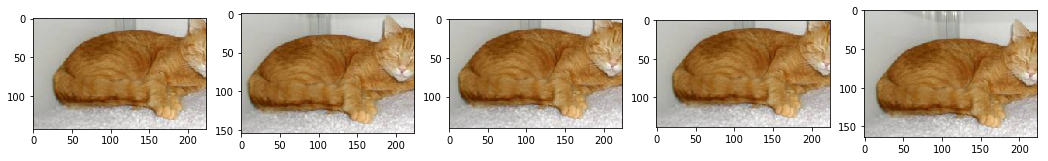

In [17]:
cropped_image1 = crop_image(image, (256, 256), (224, 224))
cropped_image2 = crop_image(image, (256, 256), (224, 224))
cropped_image3 = crop_image(image, (256, 256), (224, 224))
cropped_image4 = crop_image(image, (256, 256), (224, 224))
cropped_image5 = crop_image(image, (256, 256), (224, 224))

figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(cropped_image1)
axes[1].imshow(cropped_image2)
axes[2].imshow(cropped_image3)
axes[3].imshow(cropped_image4)
axes[4].imshow(cropped_image5)

plt.show()

In [19]:
X_train_crop, y_train_crop = crop_images(X_train_256, y_train, 2, (256, 256), (224, 224))

In [20]:
X_train_crop.shape, y_train_crop.shape

((4000, 224, 224, 3), (4000,))